In [41]:
import librosa
import tensorflow as tf
print(tf.__version__)
import csv
import numpy as np
import matplotlib.pyplot as plt
import nltk
import os
import sys
from IPython.display import Audio

2.2.0


In [42]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [43]:
os.getcwd()

'/content'

In [0]:
filepath = "/content/gdrive/My Drive/cat/"
sound_path = filepath + '0ab3b47d_nohash_0.wav'

In [0]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

In [46]:
samples , sampling_rate = librosa.load(filepath+'0ab3b47d_nohash_0.wav',sr =None , mono =True , offset = 0.0 ,duration = None)

len(samples) , sampling_rate

(16000, 16000)

In [47]:
duration = len(samples)/sampling_rate
duration

1.0

In [48]:
Audio(sound_path)

In [49]:
# ipd.Audio(samples, rate=sample_rate)
# print(sample_rate)

NameError: ignored

In [0]:
from librosa import display
plt.figure()
librosa.display.waveplot(y = samples , sr = sampling_rate)
plt.xlabel("Time(sec)")
plt.ylabel("Amplitude")
plt.show()

In [0]:
#this figure only tells us about time domain and its relation with loudness(amplitude) while which is morepronounced to get that frequency domain plot 
#so we need to use fourier transform

In [0]:

# def spectrogram(samples, sample_rate, stride_ms = 10.0, 
#                           window_ms = 20.0, max_freq = None, eps = 1e-14):

#     stride_size = int(0.001 * sample_rate * stride_ms)
#     window_size = int(0.001 * sample_rate * window_ms)

#     # Extract strided windows
#     truncate_size = (len(samples) - window_size) % stride_size
#     samples = samples[:len(samples) - truncate_size]
#     nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
#     nstrides = (samples.strides[0], samples.strides[0] * stride_size)
#     windows = np.lib.stride_tricks.as_strided(samples, 
#                                           shape = nshape, strides = nstrides)
    
#     assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

#     # Window weighting, squared Fast Fourier Transform (fft), scaling
#     weighting = np.hanning(window_size)[:, None]
    
#     fft = np.fft.rfft(windows * weighting, axis=0)
#     fft = np.absolute(fft)
#     fft = fft**2
    
#     scale = np.sum(weighting**2) * sample_rate
#     fft[1:-1, :] *= (2.0 / scale)
#     fft[(0, -1), :] /= scale
    
#     # Prepare fft frequency list'0ab3b47d_nohash_0.wav'
#     freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])
    
#     # Compute spectrogram feature
#     ind = np.where(freqs <= max_freq)[0][-1] + 1
#     specgram = np.log(fft[:ind, :] + eps)
#     return specgram

In [52]:
ppx = spectrogram(samples , sample_rate, max_freq = 8000)

NameError: ignored

In [0]:
def graph_spectrogram(wav_file):
    rate, data = get_wav_info(wav_file)
    nfft = 200 # Length of each window segment
    fs = 8000 # Sampling frequencies
    noverlap = 120 # Overlap between windows
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx

# Load a wav file
def get_wav_info(wav_file):
    rate, data = wavfile.read(wav_file)
    return rate, data

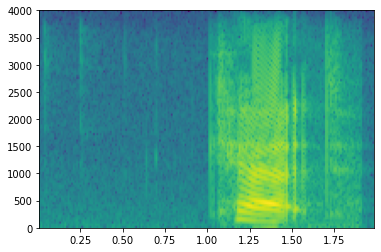

In [56]:
x = graph_spectrogram(sound_path)

In [57]:
np.array(x)

array([[1.08256922e-01, 2.28514548e-01, 1.08146758e-02, ...,
        6.79253741e-04, 2.40382843e-02, 8.35361382e-03],
       [1.18224309e-02, 3.50786769e-01, 1.23174517e-02, ...,
        4.48241640e-03, 3.38748005e-02, 9.83433411e-02],
       [8.90209563e-02, 1.06816699e-01, 8.24569958e-03, ...,
        1.56592871e-02, 3.55607877e-02, 5.26908699e-02],
       ...,
       [1.19994583e-04, 4.06695552e-05, 4.76853381e-06, ...,
        7.72045348e-06, 6.56591853e-06, 4.37169015e-05],
       [2.93025579e-05, 3.92375471e-05, 1.38934190e-05, ...,
        5.65130519e-06, 1.53565730e-05, 2.14599380e-05],
       [2.22466994e-06, 2.42859093e-05, 1.12464717e-07, ...,
        2.56375732e-06, 2.71802397e-06, 2.09314236e-07]])

In [0]:
word_to_idx = {"c":0 , "a":1 , "t":2 , "_":3 , " ":5 }
idx_to_word = dict([(key , value) for (value ,key) in word_to_idx.items() ])

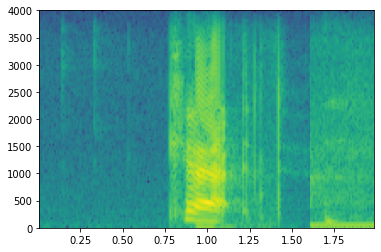

In [69]:
##now import training example 

X_Train = []
Y_Train = []

waves = [f for f in os.listdir(filepath) if f.endswith('.wav')]
for wav in waves:
  sample = graph_spectrogram(filepath + wav)
  if sample.shape == (101,198):

    # sample = sample.reshape(101*198,1)
    X_Train.append(sample)
    Y_Train.append(1)



In [70]:
Y_Train = np.array(Y_Train)
X_Train = np.array(X_Train)
print(len(X_Train),len(Y_Train))
input_length = 19998
label_length = 3
import keras.backend as K
def ctc_loss(y_true, y_pred):
    print(y_pred)
    return K.ctc_batch_cost(y_true, y_pred, input_length, label_length)

264 264


In [0]:
from keras.callbacks import ModelCheckpoint
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D
from keras.layers import GRU, Bidirectional, BatchNormalization, Reshape
from keras.optimizers import Adam

In [72]:
Y_Train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [73]:
X_Train[112].shape

(101, 198)

In [74]:
print(X_Train.shape)
Y_Train.shape

(264, 101, 198)


(264,)

In [76]:
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding , Activation, LSTM 
from keras.initializers import glorot_uniform
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras import backend as K
from keras.layers import Input,Lambda,Reshape,Flatten,Lambda

X_input = Input(shape = (101,198))

X =Conv1D(filters=196,kernel_size=15,strides=4)(X_input)                                  
X = BatchNormalization()(X)                                
X = Activation("relu")(X)                                 
X = Dropout(rate = 0.8)(X)

X = GRU(units=128, return_sequences = True)(X)                                
X = Dropout(rate = 0.8)(X)                              
X = BatchNormalization()(X)

X = Dropout(rate = 0.8)(X)

X = Flatten()(X)

# X = Lambda()

X = Dense(1 , activation='sigmoid')(X)

# X = TimeDistributed(Dense(1, activation = "sigmoid"))(X)

model = Model(inputs = X_input, outputs = X) 

model.compile(loss= 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 3
MODEL = model.fit(X_Train , Y_Train , epochs = num_epochs)

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 101, 198)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 22, 196)           582316    
_________________________________________________________________
batch_normalization_15 (Batc (None, 22, 196)           784       
_________________________________________________________________
activation_8 (Activation)    (None, 22, 196)           0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 22, 196)           0         
_________________________________________________________________
gru_8 (GRU)                  (None, 22, 128)           124800    
_________________________________________________________________
dropout_23 (Dropout)         (None, 22, 128)           0   